In [62]:
from google.colab import files

In [63]:
data=files.upload()

Saving sleep_deprivation_dataset_detailed.csv to sleep_deprivation_dataset_detailed (1).csv


In [64]:
import pandas as pd
import io
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [65]:
filename = list(data.keys())[0]
df = pd.read_csv(io.StringIO(data[filename].decode('utf-8')))


In [66]:
df.head()

,Participant_ID,Sleep_Hours,Sleep_Quality_Score,Daytime_Sleepiness,Stroop_Task_Reaction_Time,N_Back_Accuracy,Emotion_Regulation_Score,PVT_Reaction_Time,Age,Gender,BMI,Caffeine_Intake,Physical_Activity_Level,Stress_Level
0,P1,5.25,15,12,1.60,64.20,12,365.85,35,Female,30.53,2,1,33
1,P2,8.70,12,14,2.54,65.27,21,288.95,20,Male,27.28,3,8,37
2,P3,7.39,17,10,3.40,74.28,35,325.93,18,Male,30.00,1,2,32
3,P4,6.59,14,3,3.54,72.42,25,276.86,18,Male,34.47,5,0,23
4,P5,3.94,20,12,3.09,99.72,60,383.45,36,Male,29.70,3,4,14


In [67]:
df.shape

(60, 14)

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Participant_ID             60 non-null     object 
 1   Sleep_Hours                60 non-null     float64
 2   Sleep_Quality_Score        60 non-null     int64  
 3   Daytime_Sleepiness         60 non-null     int64  
 4   Stroop_Task_Reaction_Time  60 non-null     float64
 5   N_Back_Accuracy            60 non-null     float64
 6   Emotion_Regulation_Score   60 non-null     int64  
 7   PVT_Reaction_Time          60 non-null     float64
 8   Age                        60 non-null     int64  
 9   Gender                     60 non-null     object 
 10  BMI                        60 non-null     float64
 11  Caffeine_Intake            60 non-null     int64  
 12  Physical_Activity_Level    60 non-null     int64  
 13  Stress_Level               60 non-null     int64  
d

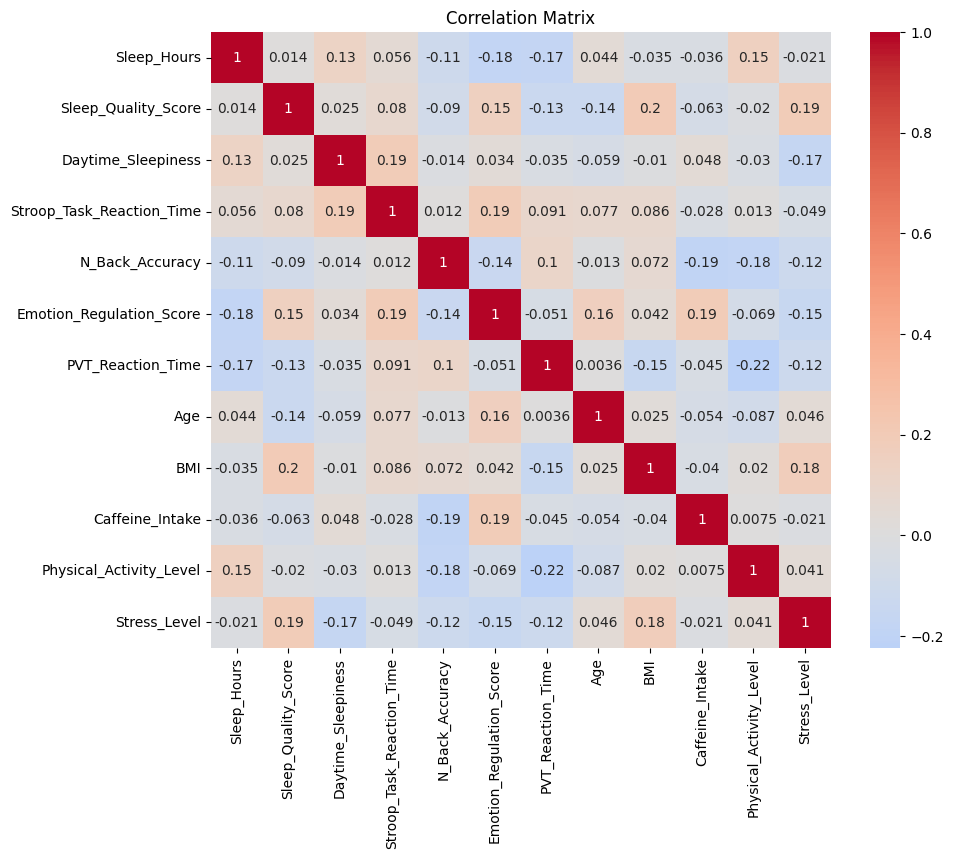

In [69]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
if len(numerical_cols) > 1:
    plt.figure(figsize=(10, 8))
    correlation_matrix = df[numerical_cols].corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
    plt.title('Correlation Matrix')
    plt.show()

We see that the columns do not have any strong linear relations among themselves.

Next, we check for outliers

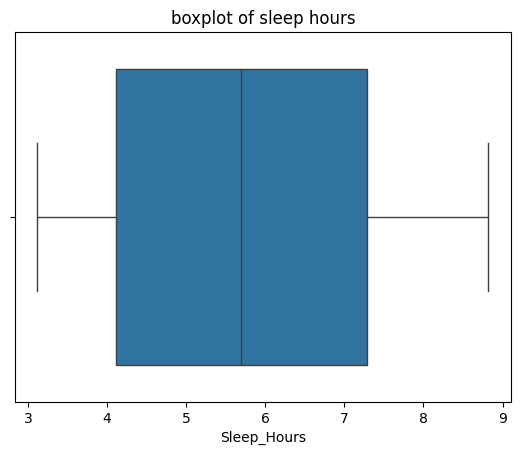

In [70]:
sns.boxplot(x=df['Sleep_Hours'])
plt.title('boxplot of sleep hours')
plt.show()#no outliers

Most of the people have 'sleep hours' of around 4 to about 7.5.No outliers here

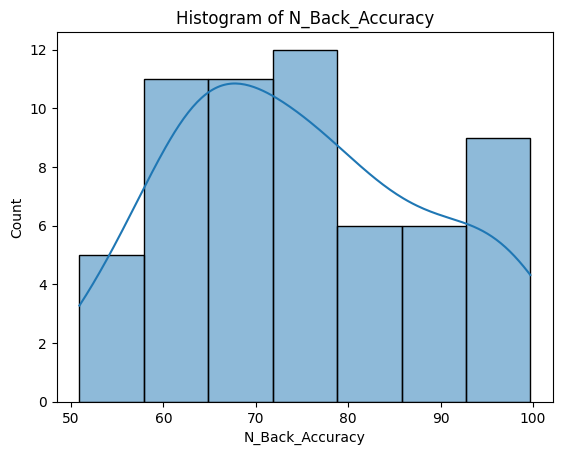

In [71]:
sns.histplot(df['N_Back_Accuracy'],kde=True)
plt.title('Histogram of N_Back_Accuracy')
plt.show()

there are no outliers here too.But the data is slightly left skewed.

Most of the participants had an accuracy of 70 to 80.

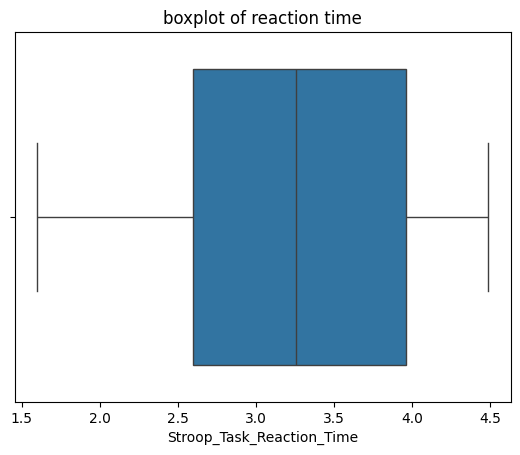

In [72]:
sns.boxplot(x=df['Stroop_Task_Reaction_Time'])
plt.title('boxplot of reaction time')
plt.show()

This is the time taken by the participant to name the colour of a word(usually a colour'name when it is written in a different colour)Eg: Blue is written in red and the participant has to answer red becuase that was the ink colour.

The time most participants took for this stroop is between 2.5 to 4.

In [73]:
df1=df.copy()

In [74]:
df1['sleep_debt']=abs(df1['Sleep_Hours']-8)

In [75]:
df1.head()

,Participant_ID,Sleep_Hours,Sleep_Quality_Score,Daytime_Sleepiness,Stroop_Task_Reaction_Time,N_Back_Accuracy,Emotion_Regulation_Score,PVT_Reaction_Time,Age,Gender,BMI,Caffeine_Intake,Physical_Activity_Level,Stress_Level,sleep_debt
0,P1,5.25,15,12,1.60,64.20,12,365.85,35,Female,30.53,2,1,33,2.75
1,P2,8.70,12,14,2.54,65.27,21,288.95,20,Male,27.28,3,8,37,0.70
2,P3,7.39,17,10,3.40,74.28,35,325.93,18,Male,30.00,1,2,32,0.61
3,P4,6.59,14,3,3.54,72.42,25,276.86,18,Male,34.47,5,0,23,1.41
4,P5,3.94,20,12,3.09,99.72,60,383.45,36,Male,29.70,3,4,14,4.06


In [76]:
df1['Age_Sleep_Interaction'] = df1['Age'] * df1['sleep_debt']

In [77]:
df1.head()

,Participant_ID,Sleep_Hours,Sleep_Quality_Score,Daytime_Sleepiness,Stroop_Task_Reaction_Time,N_Back_Accuracy,Emotion_Regulation_Score,PVT_Reaction_Time,Age,Gender,BMI,Caffeine_Intake,Physical_Activity_Level,Stress_Level,sleep_debt,Age_Sleep_Interaction
0,P1,5.25,15,12,1.60,64.20,12,365.85,35,Female,30.53,2,1,33,2.75,96.25
1,P2,8.70,12,14,2.54,65.27,21,288.95,20,Male,27.28,3,8,37,0.70,14.00
2,P3,7.39,17,10,3.40,74.28,35,325.93,18,Male,30.00,1,2,32,0.61,10.98
3,P4,6.59,14,3,3.54,72.42,25,276.86,18,Male,34.47,5,0,23,1.41,25.38
4,P5,3.94,20,12,3.09,99.72,60,383.45,36,Male,29.70,3,4,14,4.06,146.16


In [78]:
df1['Sedentary_Risk'] = (df1['Physical_Activity_Level'] < 4).astype(int)
df1['BMI_Risk'] = ((df1['BMI'] < 18.5) | (df1['BMI'] > 30)).astype(int)
df1['Cognitive_Risk_Score'] = (df1['sleep_debt'] * 0.3 +df1['Stress_Level'] * 0.25 +df1['Daytime_Sleepiness'] * 0.2 +df1['BMI_Risk'] * 2 +df1['Sedentary_Risk'] * 1.5)


In [79]:
df1.sample(5)

,Participant_ID,Sleep_Hours,Sleep_Quality_Score,Daytime_Sleepiness,Stroop_Task_Reaction_Time,N_Back_Accuracy,Emotion_Regulation_Score,PVT_Reaction_Time,Age,Gender,BMI,Caffeine_Intake,Physical_Activity_Level,Stress_Level,sleep_debt,Age_Sleep_Interaction,Sedentary_Risk,BMI_Risk,Cognitive_Risk_Score
49,P50,4.11,14,1,4.07,96.50,33,474.56,20,Male,33.62,0,1,11,3.89,77.80,1,1,7.617
55,P56,8.53,16,16,3.51,64.76,41,391.48,34,Male,23.01,2,5,8,0.53,18.02,0,0,5.359
46,P47,4.87,13,19,2.34,68.63,54,328.49,22,Male,23.49,5,6,0,3.13,68.86,0,0,4.739
45,P46,6.98,4,16,2.07,74.26,14,224.26,27,Female,27.45,0,0,5,1.02,27.54,1,0,6.256
7,P8,8.20,14,21,3.28,74.69,66,388.37,29,Male,32.25,1,0,4,0.20,5.80,1,1,8.760


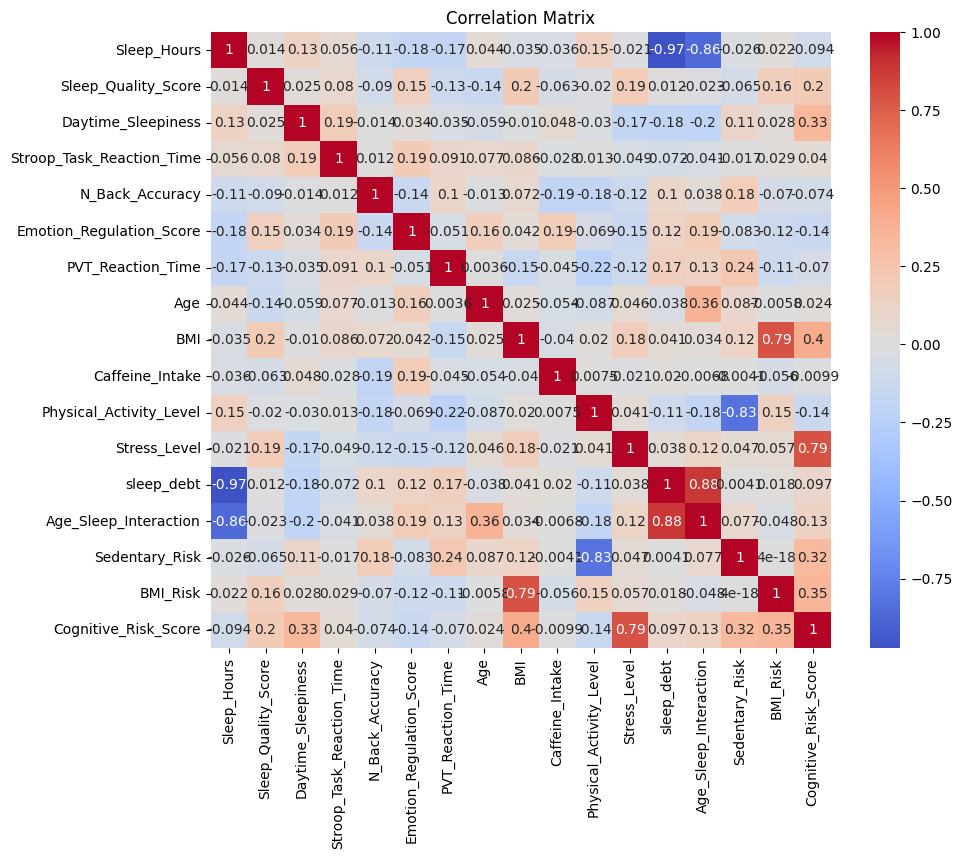

In [80]:
numerical_cols = df1.select_dtypes(include=['int64', 'float64']).columns
if len(numerical_cols) > 1:
    plt.figure(figsize=(10, 8))
    correlation_matrix = df1[numerical_cols].corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
    plt.title('Correlation Matrix')
    plt.show()

In [81]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [82]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Participant_ID             60 non-null     object 
 1   Sleep_Hours                60 non-null     float64
 2   Sleep_Quality_Score        60 non-null     int64  
 3   Daytime_Sleepiness         60 non-null     int64  
 4   Stroop_Task_Reaction_Time  60 non-null     float64
 5   N_Back_Accuracy            60 non-null     float64
 6   Emotion_Regulation_Score   60 non-null     int64  
 7   PVT_Reaction_Time          60 non-null     float64
 8   Age                        60 non-null     int64  
 9   Gender                     60 non-null     object 
 10  BMI                        60 non-null     float64
 11  Caffeine_Intake            60 non-null     int64  
 12  Physical_Activity_Level    60 non-null     int64  
 13  Stress_Level               60 non-null     int64  
 

In [83]:
X=df1[['Sleep_Hours','Sleep_Quality_Score','Daytime_Sleepiness','Age','BMI','Caffeine_Intake','Physical_Activity_Level','Stress_Level']]

In [84]:
scaler=StandardScaler()
X_scaler=scaler.fit_transform(X)

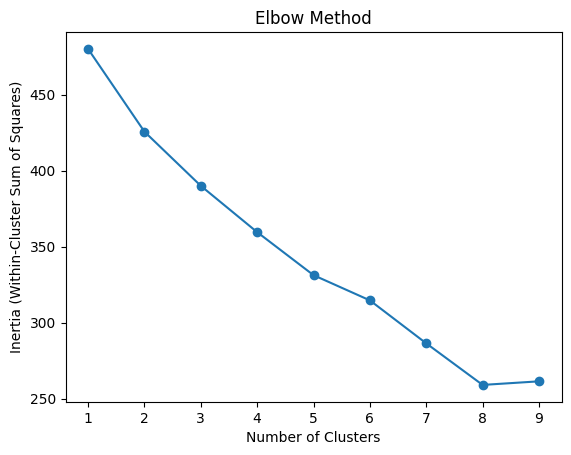

In [85]:
from sklearn.cluster import KMeans
inertias = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaler)
    inertias.append(kmeans.inertia_)

plt.plot(range(1, 10), inertias, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia (Within-Cluster Sum of Squares)")
plt.title("Elbow Method")
plt.show()

In [86]:
kmeans = KMeans(n_clusters=2, random_state=42)
df1['Cluster'] = kmeans.fit_predict(X_scaler)

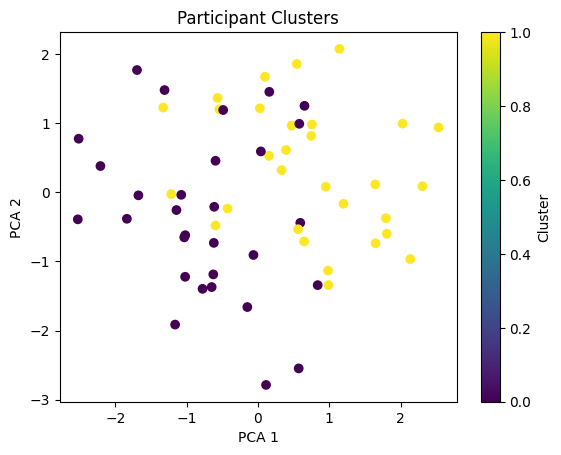

In [87]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaler)

plt.scatter(X_pca[:,0], X_pca[:,1], c=df1['Cluster'], cmap='viridis')
plt.title("Participant Clusters")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.colorbar(label='Cluster')
plt.show()


<Axes: xlabel='Cluster'>

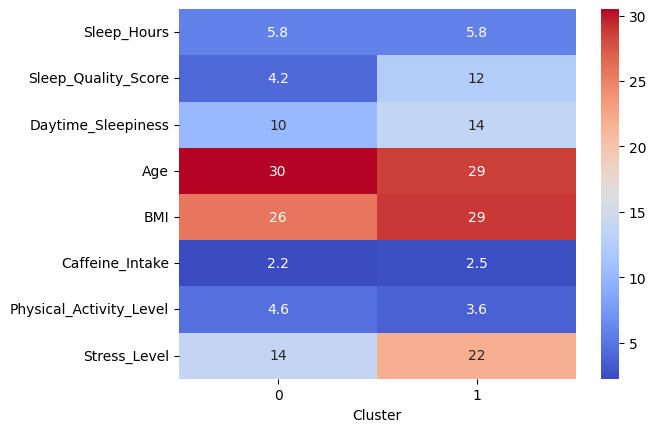

In [88]:
cluster_profile = df1.groupby('Cluster')[X.columns].mean().T
sns.heatmap(cluster_profile, annot=True, cmap='coolwarm')

In [89]:
df1['Cluster'] = kmeans.labels_


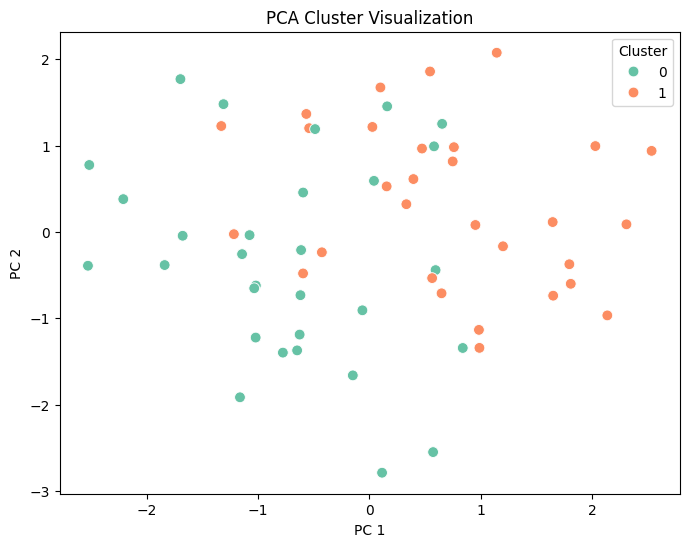

In [90]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaler)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df1['Cluster'], palette='Set2', s=60)
plt.title('PCA Cluster Visualization')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.show()

In [91]:
from sklearn.metrics import silhouette_score

score = silhouette_score(X_scaler, df1['Cluster'])
print("Silhouette Score:", score)


Silhouette Score: 0.09629308016657454


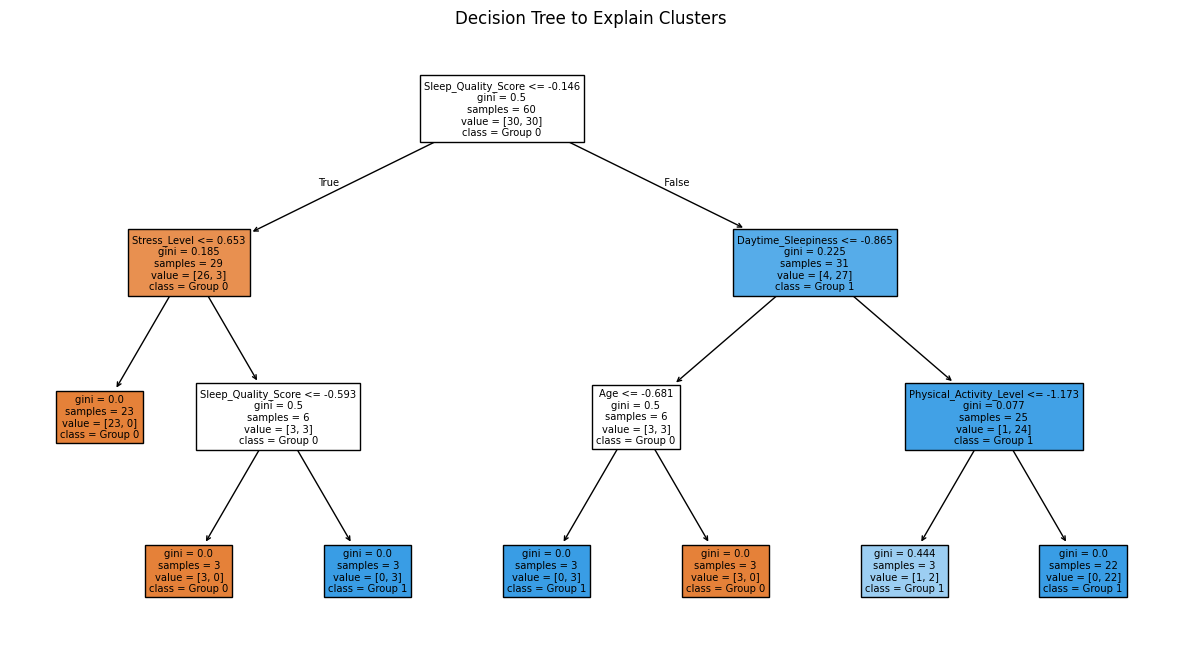

In [92]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

clf = DecisionTreeClassifier(max_depth=3, random_state=42)
clf.fit(X_scaler, df1['Cluster'])

plt.figure(figsize=(15, 8))
plot_tree(clf, feature_names=X.columns, class_names=["Group 0", "Group 1"], filled=True)
plt.title("Decision Tree to Explain Clusters")
plt.show()



In [93]:
import joblib
joblib.dump(kmeans, "kmeans_model.pkl")
joblib.dump(scaler, "scaler.pkl")


['scaler.pkl']

In [94]:
from google.colab import files
files.download("kmeans_model.pkl")
files.download("scaler.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [96]:
import numpy as np
sample1 = X_scaler[0]
sample2 = X_scaler[-1]
print(kmeans.predict([sample1]))
print(kmeans.predict([sample2]))

[1]
[0]


In [97]:
feature_order = list(X.columns)
print(feature_order)


['Sleep_Hours', 'Sleep_Quality_Score', 'Daytime_Sleepiness', 'Age', 'BMI', 'Caffeine_Intake', 'Physical_Activity_Level', 'Stress_Level']


In [98]:
print(list(X.columns))

['Sleep_Hours', 'Sleep_Quality_Score', 'Daytime_Sleepiness', 'Age', 'BMI', 'Caffeine_Intake', 'Physical_Activity_Level', 'Stress_Level']
